In [3]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.3.0
asttokens                    3.0.0
astunparse                   1.6.3
cachetools                   5.5.2
certifi                      2025.4.26
charset-normalizer           3.4.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
exceptiongroup               1.3.0
executing                    2.2.0
flatbuffers                  25.2.10
fonttools                    4.58.1
gast                         0.4.0
google-auth                  2.40.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.71.0
h5py                         3.13.0
idna                         3.10
ipykernel                    6.29.5
ipython                      8.36.0
jax                          0.4.3

In [5]:

import tensorflow as tf
import os

KeyboardInterrupt: 

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
tf.config.list_physical_devices('GPU')

[]

In [17]:
import os
import zipfile
import cv2
import imghdr

data_dir = 'data'
image_exts = ['jpeg', 'png', 'jpg', 'bmp', 'webp']  # your allowed extensions

# Step 1: Extract zip files in data_dir if not extracted yet
for item in os.listdir(data_dir):
    if item.endswith('.zip'):
        zip_path = os.path.join(data_dir, item)
        extract_folder = os.path.join(data_dir, os.path.splitext(item)[0])
        if not os.path.exists(extract_folder):
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_folder)

# Step 2: Now your existing logic to loop through folders and images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # make sure it's a folder (skip zip files)
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)  # keep commented if you want

In [131]:

import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data')

NameError: name 'tf' is not defined

In [1]:

data_iterator = data.as_numpy_iterator()

NameError: name 'data' is not defined

In [135]:
batch = data_iterator.next()

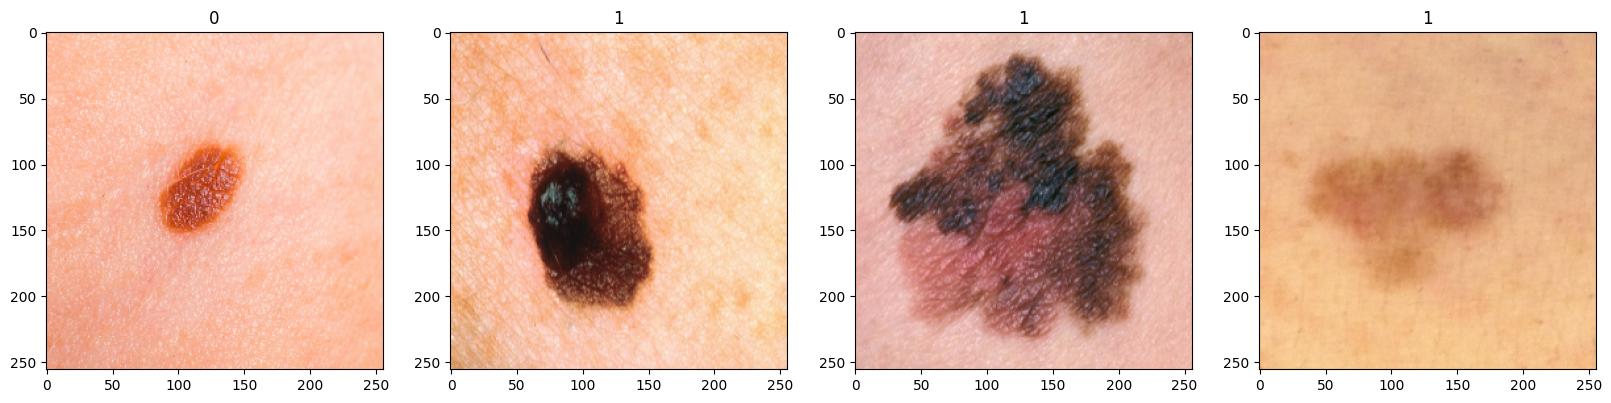

In [136]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [137]:
#Scaling the data

In [173]:
data_dir = 'data'



In [187]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=(256, 256),
    batch_size=32
)

data = data.map(lambda x, y: (x / 255.0, y))

Found 56 files belonging to 2 classes.


In [188]:

data.as_numpy_iterator().next() #converts the tensorflow dataset to a numpy iterator and fetches the next batch.Used to check the output after preprocessing, to make sure its scaled between 0 and 1.

(array([[[[0.8627451 , 0.7254902 , 0.7529412 ],
          [0.8704427 , 0.7331878 , 0.7606388 ],
          [0.86453736, 0.72728246, 0.75473344],
          ...,
          [0.7209712 , 0.6033241 , 0.595481  ],
          [0.7176471 , 0.6       , 0.5921569 ],
          [0.7176471 , 0.6       , 0.5921569 ]],
 
         [[0.8672718 , 0.7300168 , 0.7574678 ],
          [0.8769439 , 0.739689  , 0.76714   ],
          [0.8740003 , 0.7367454 , 0.7641964 ],
          ...,
          [0.71882284, 0.6011758 , 0.59333265],
          [0.7150949 , 0.5974479 , 0.58960474],
          [0.7131204 , 0.59547335, 0.5876302 ]],
 
         [[0.8742111 , 0.7369562 , 0.76440716],
          [0.88691014, 0.7496552 , 0.77710617],
          [0.88850695, 0.75125206, 0.77870303],
          ...,
          [0.7155293 , 0.5978823 , 0.59003913],
          [0.7111825 , 0.5935354 , 0.5856923 ],
          [0.70618105, 0.588534  , 0.58069086]],
 
         ...,
 
         [[0.8698912 , 0.7167509 , 0.6972426 ],
          [0.85719

In [205]:
# 3. Split data into train and validation sets
dataset_size = len(data)
train_size = int(dataset_size * 0.7)
val_size = dataset_size - train_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)



In [190]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # type: ignore

In [209]:
model = Sequential()

In [ ]:
#Conv2D-scans with 16 kernels of size 3x3, strides of 1, and ReLU activation function
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [211]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [212]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 16)     

In [213]:
model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [214]:
#Training the model

In [215]:

logdir='logs'

In [216]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [218]:
# 7. Train the model
hist = model.fit(
    train,
    epochs=20,
    validation_data=val)

Epoch 1/20
1/1 [==============================] - 1s 978ms/step - loss: 0.6826 - accuracy: 0.5938 - val_loss: 1.5636 - val_accuracy: 0.4583
Epoch 2/20
1/1 [==============================] - 1s 554ms/step - loss: 1.5556 - accuracy: 0.5000 - val_loss: 0.6513 - val_accuracy: 0.6250
Epoch 3/20
1/1 [==============================] - 1s 580ms/step - loss: 0.7612 - accuracy: 0.4062 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 1s 566ms/step - loss: 0.6855 - accuracy: 0.5312 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 1s 557ms/step - loss: 0.6782 - accuracy: 0.5625 - val_loss: 0.6839 - val_accuracy: 0.5417
Epoch 6/20
1/1 [==============================] - 1s 567ms/step - loss: 0.7175 - accuracy: 0.4375 - val_loss: 0.6658 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 1s 567ms/step - loss: 0.6886 - accuracy: 0.5625 - val_loss: 0.6788 - val_accuracy: 0.5833
Epoch 8/20
1/1 [====

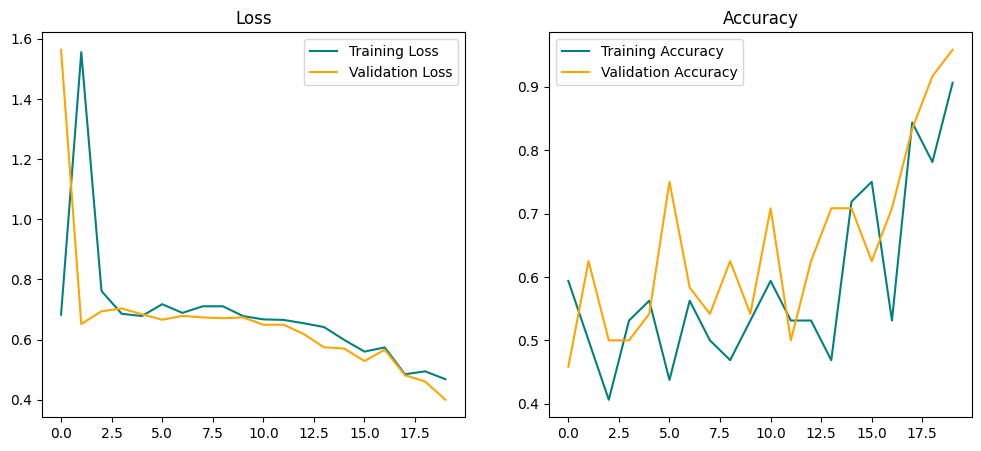

In [219]:
# 8. Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss', color='teal')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='teal')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.legend()

plt.show()

In [220]:
#Evaluating the model

In [239]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [240]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [241]:

for batch in val.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 69ms/step


In [242]:
print(f'Precision: {pre.result().numpy():.4f}')
print(f'Recall: {re.result().numpy():.4f}')
print(f'Accuracy: {acc.result().numpy():.4f}')

Precision: 0.8667
Recall: 1.0000
Accuracy: 0.9167


In [ ]:
#Testing the model

In [247]:

import cv2


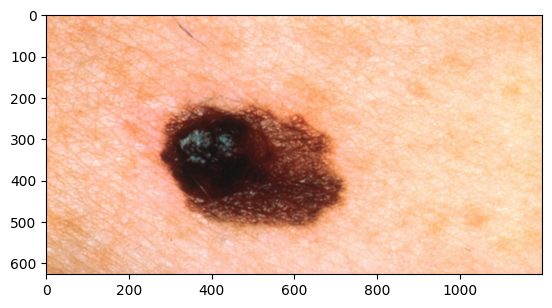

In [250]:
img = cv2.imread('data/malignant/asymmetry.jpg')
if img is not None:
	img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(img_rgb)
	plt.show()
else:
	print("Image not found or unable to load.")

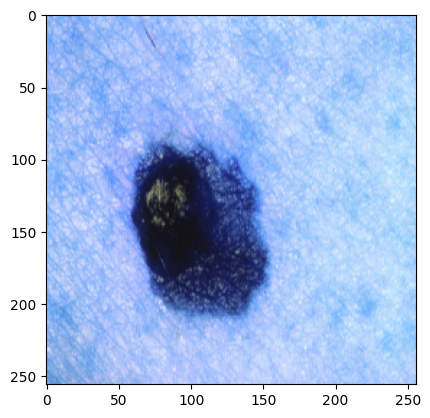

In [251]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [252]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [253]:

yhat

array([[0.599139]], dtype=float32)

In [254]:

if yhat > 0.5: 
    print(f'Predicted class is Malignant')
else:
    print(f'Predicted class is Benign')

Predicted class is Malignant


In [ ]:
#Save the model

In [3]:

%pip install tensorflow

from tensorflow.keras.models import load_model # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [257]:

model.save(os.path.join('models','imageclassifier.h5'))

In [259]:

new_model = load_model('models/imageclassifier.h5')

In [260]:

new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 49ms/step


array([[0.599139]], dtype=float32)